In [1]:
#분류/회귀? => 회귀 => 자전거대여랑 예측문제

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
train=pd.read_csv("bike-sharing-demand/train.csv", parse_dates=['datetime'])
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [5]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

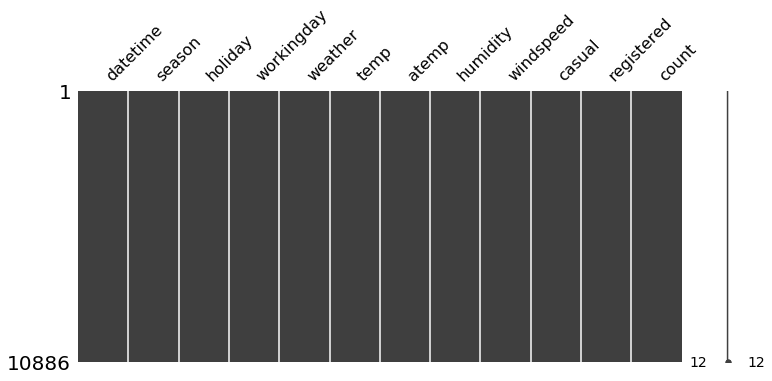

In [6]:
import missingno as msno
msno.matrix(train, figsize=(12,5))

In [7]:
train.datetime

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
5       2011-01-01 05:00:00
6       2011-01-01 06:00:00
7       2011-01-01 07:00:00
8       2011-01-01 08:00:00
9       2011-01-01 09:00:00
10      2011-01-01 10:00:00
11      2011-01-01 11:00:00
12      2011-01-01 12:00:00
13      2011-01-01 13:00:00
14      2011-01-01 14:00:00
15      2011-01-01 15:00:00
16      2011-01-01 16:00:00
17      2011-01-01 17:00:00
18      2011-01-01 18:00:00
19      2011-01-01 19:00:00
20      2011-01-01 20:00:00
21      2011-01-01 21:00:00
22      2011-01-01 22:00:00
23      2011-01-01 23:00:00
24      2011-01-02 00:00:00
25      2011-01-02 01:00:00
26      2011-01-02 02:00:00
27      2011-01-02 03:00:00
28      2011-01-02 04:00:00
29      2011-01-02 06:00:00
                ...        
10856   2012-12-18 18:00:00
10857   2012-12-18 19:00:00
10858   2012-12-18 20:00:00
10859   2012-12-18 21:00:00
10860   2012-12-18 2

In [8]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second
train.shape
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0.5, 1.0, '시간별 대여량')]

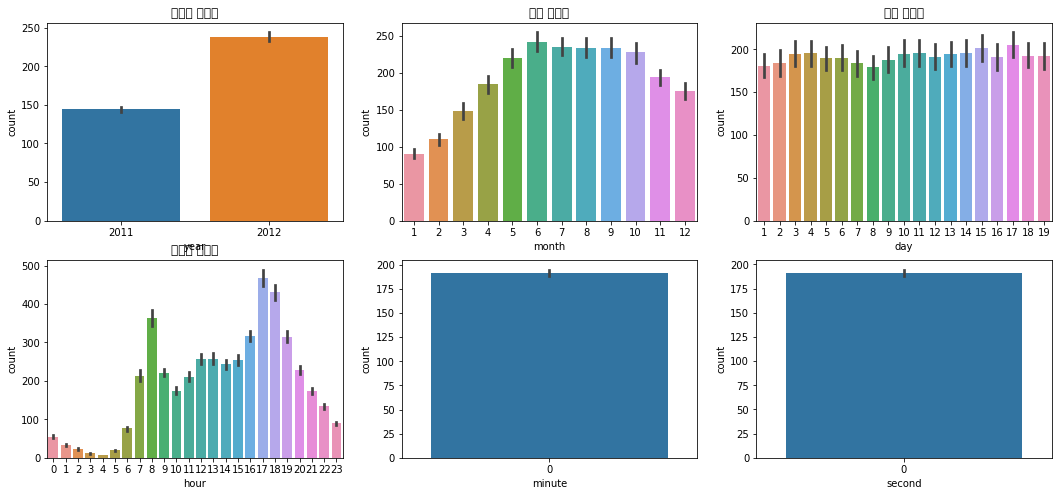

In [9]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(18,8)
sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)
sns.barplot(data=train, x='minute', y='count', ax=ax5)
sns.barplot(data=train, x='second', y='count', ax=ax6)

ax1.set(title="연도별 대여량")
ax2.set(title="월별 대여량")
ax3.set(title="일별 대여량")
ax4.set(title="시간별 대여량")


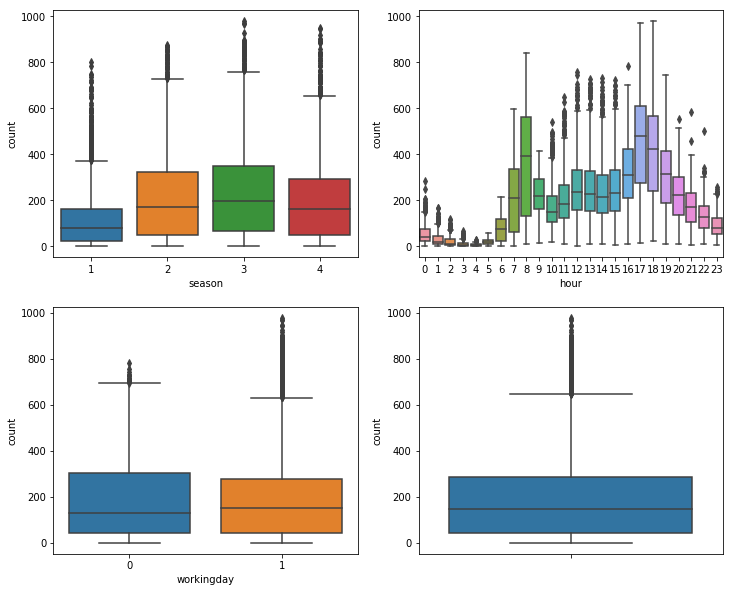

In [10]:
fig, axes=plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=train, y='count',x="season", orient="v", ax=axes[0][0])
sns.boxplot(data=train, y='count',x="hour", orient="v", ax=axes[0][1])
sns.boxplot(data=train, y='count',x="workingday", orient="v", ax=axes[1][0])
sns.boxplot(data=train, y='count', orient="v", ax=axes[1][1])

In [11]:
train['dayofweek']=train['datetime'].dt.dayofweek
train.shape
#0:월요일~6:일요일

(10886, 19)

In [12]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

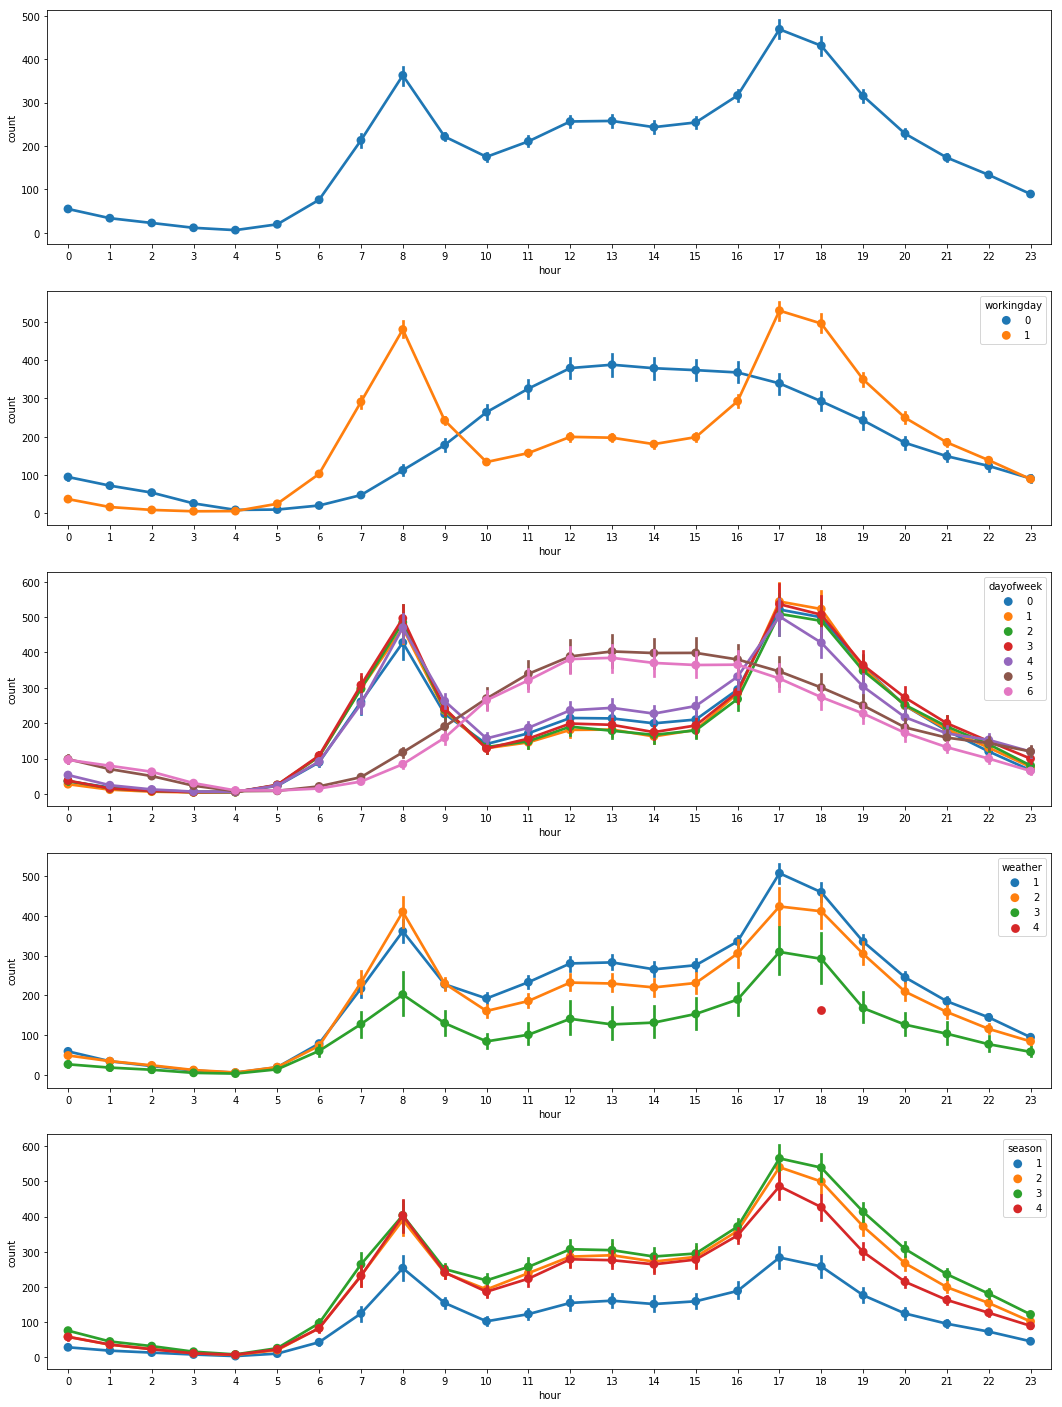

In [13]:
#시간의 흐름에 따른 그래프(0~23)
#근무일의 여부에 따른 그래프(0,1)
#요일에 따른 그래프(0~6)
#계절에 따른 그래프(1~4)
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=5)
fig.set_size_inches(18,25)
sns.pointplot(data=train, x="hour", y="count", ax=ax1)
sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax2)
sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax3)
sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax4)
sns.pointplot(data=train, x="hour", y="count", hue="season", ax=ax5)

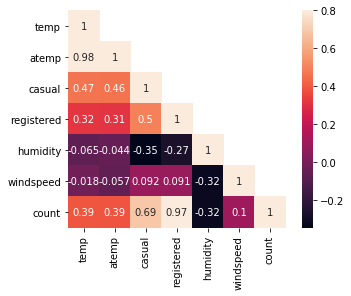

In [23]:
train.columns
corrMatt=train[['temp','atemp','casual', 
       'registered','humidity', 'windspeed','count']]
corrMatt=corrMatt.corr()

mask=np.array(corrMatt)
#mask
mask[np.tril_indices_from(mask)]=False
sns.heatmap(corrMatt, mask=mask,square=True, 
            annot=True, vmax=.8)

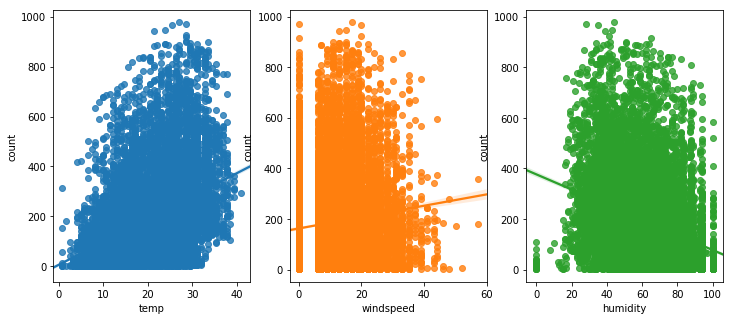

In [18]:
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x="temp", y="count", data=train, ax=ax1)
sns.regplot(x="windspeed", y="count", data=train, ax=ax2)
sns.regplot(x="humidity", y="count", data=train, ax=ax3)

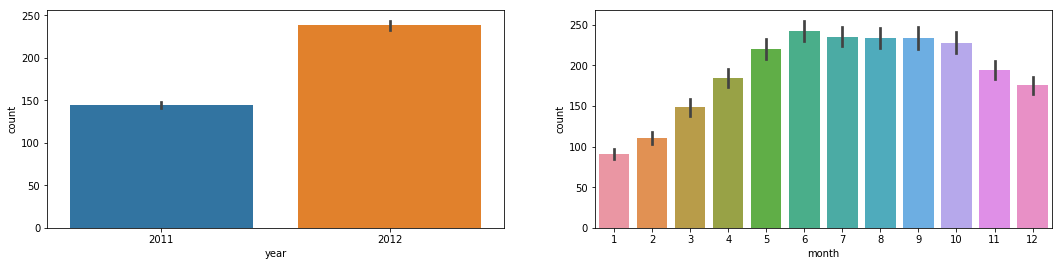

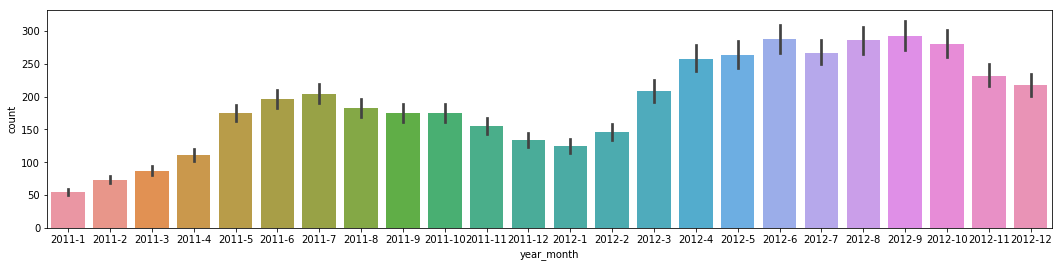

In [30]:
def cym(dtime):
    return "{0}-{1}".format(dtime.year,dtime.month)

train['year_month']=train['datetime'].apply(cym)
train['year_month']

fig, (ax1,ax2)=plt.subplots(ncols=2)
fig.set_size_inches(18,4)
sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)

fig, ax3=plt.subplots()
fig.set_size_inches(18,4)
sns.barplot(data=train, x='year_month', y='count', ax=ax3)

In [40]:
trainWithoutOutliers=train[np.abs(train['count']-train['count'].mean()) <= 3*train['count'].std()] #181*3
trainWithoutOutliers.shape
train.shape

(10886, 20)

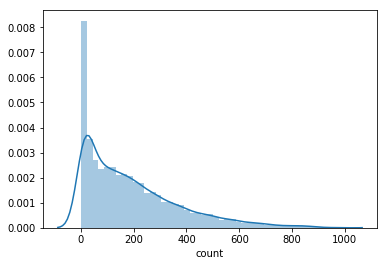

In [41]:
sns.distplot(train['count'])

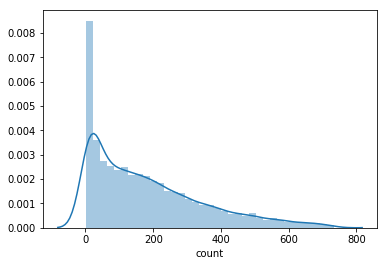

In [42]:
sns.distplot(trainWithoutOutliers['count'])

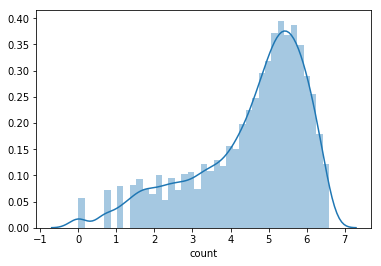

In [43]:
sns.distplot(np.log(trainWithoutOutliers['count']))

In [44]:
#랜덤포레스트 기반 예측


In [151]:
train=pd.read_csv("bike-sharing-demand/train.csv", parse_dates=['datetime'])
train.shape

(10886, 12)

In [152]:
test=pd.read_csv("bike-sharing-demand/test.csv", parse_dates=['datetime'])
test.shape

(6493, 9)

In [153]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second
train['dayofweek']=train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [154]:
test['year']=test['datetime'].dt.year
test['month']=test['datetime'].dt.month
test['day']=test['datetime'].dt.day
test['hour']=test['datetime'].dt.hour
test['minute']=test['datetime'].dt.minute
test['second']=test['datetime'].dt.second
test['dayofweek']=test['datetime'].dt.dayofweek
test.shape

(6493, 16)

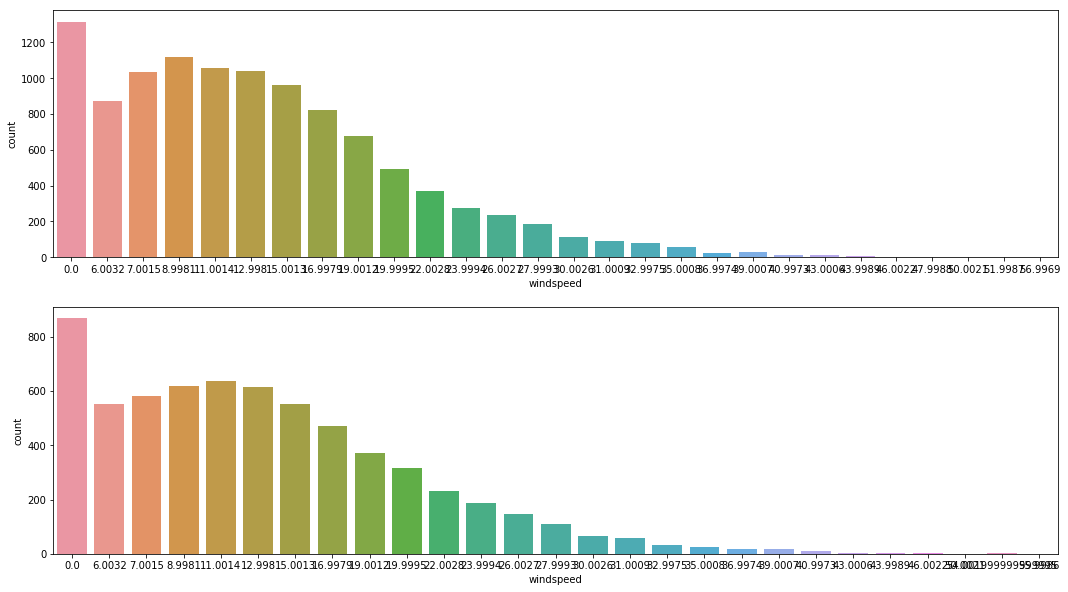

In [155]:
fig, axes=plt.subplots(nrows=2)
fig.set_size_inches(18,10)
sns.countplot(data=train, ax=axes[0], x="windspeed")
sns.countplot(data=test, ax=axes[1], x="windspeed")

In [156]:
#풍속이 0인 값을 일괄적으로 평균으로 대체
#train.loc[train['windspeed']==0,'windspeed']=train['windspeed'].mean()
#test.loc[train['windspeed']==0,'windspeed']=train['windspeed'].mean()

#train.loc[train['windspeed']==0]
trainWind0=train.loc[train['windspeed']==0]
trainWindNot0=train.loc[train['windspeed']!=0]
#풍속0, 풍속이 0이 아닌것
print(trainWind0.shape)
print(trainWindNot0.shape)


(1313, 19)
(9573, 19)


In [157]:
#풍속을 예측하여 결측값 처리
from sklearn.ensemble import RandomForestClassifier

In [158]:
def predict_windspeed(data):    
    dataWind0=data.loc[data['windspeed']==0]
    dataWindNot0=data.loc[data['windspeed']!=0]
    wCol=['season', 'weather', 'humidity', 'month','temp', 'year', 'atemp']
    
    #풍속이 0이 아닌 데이터들의 타입을 str로 변경
    dataWindNot0['windspeed']=dataWindNot0['windspeed'].astype('str')
    
    rfModel_wind=RandomForestClassifier()
    rfModel_wind.fit(dataWindNot0[wCol],dataWindNot0['windspeed'])
    #풍속이 0이 아닌값으로 모델 생성
    #풍속이 0인 값들을 예측
    
    wind0Values=rfModel_wind.predict(X=dataWind0[wCol])
    
    predictWind0=dataWind0
    predictWindNot0=dataWindNot0
   
    predictWind0['windspeed']=wind0Values
    data=predictWindNot0.append(predictWind0)   
    data['windspeed']=data['windspeed'].astype('float')
    data.reset_index(inplace=True)
    return data


In [159]:
train=predict_windspeed(train)
#test=predict_windspeed(test)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [160]:
train.head()

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0,5
1,10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,1,1,10,0,0,5
2,11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,1,1,11,0,0,5
3,12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011,1,1,12,0,0,5
4,13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011,1,1,13,0,0,5


In [161]:
print(train.shape)
train.info()
#train['count']
#print("="*50)
#print(test)

(10886, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
index         10886 non-null int64
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
minute        10886 non-null int64
second        10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(16)
memory usage: 1.7 MB


In [162]:
print(np.min(train['count'])) #1
print(np.max(train['count'])) #977
train.info()


1
977
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
index         10886 non-null int64
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
minute        10886 non-null int64
second        10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(16)
memory usage: 1.7 MB


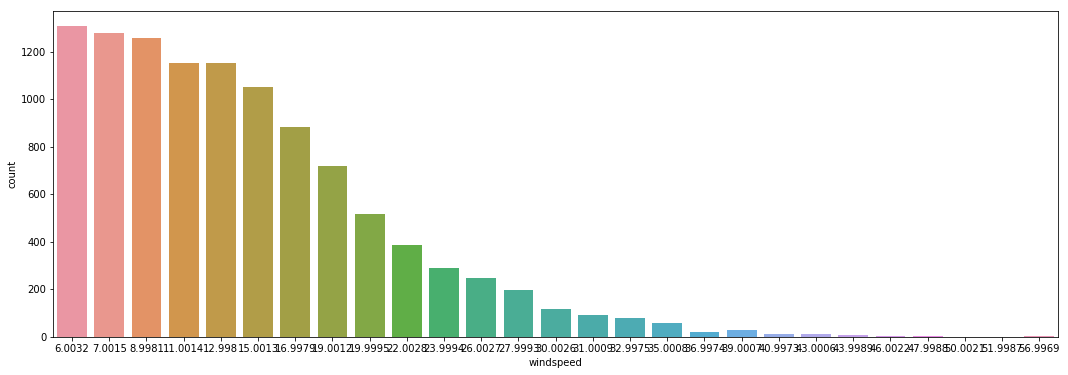

In [163]:
#x축은 풍속, y축은 count 트레인데이터 시각화
fig,ax1=plt.subplots()
fig.set_size_inches(18,6)
sns.countplot(data=train, x="windspeed", ax=ax1)

In [165]:
#피처 선택
#신호와 잡음 구분
#피처가 무조건 많다고 해서 좋은 성능이 보장되지는 않음
#피처를 하나씩 추가하면서(변경), 성능이 좋지 않은 피처는 제거

cfn=['season', 'holiday', 'workingday', 'weather',
    'dayofweek', 'year', 'month', 'hour']
train.info()
for var in cfn:
    train[var]=train[var].astype('category')
    test[var]=test[var].astype('category')
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
index         10886 non-null int64
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
minute        10886 non-null int64
second        10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(16)
memory usage: 1.7 MB


In [166]:
#def rmsle(pv, av):
    
    

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [168]:
model=RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100)
model

#model.fit(트레이닝x, 트레이닝y)
#예측
#예측결과(count)=model.predict(테스트데이터의 x)
#submission['count']=예측결과(count)

#제출 -> 등수 확인


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)